# Imports

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
from sklearn.preprocessing import normalize

In [83]:
data = pd.read_csv('Data/training_1.csv')


# Familiarization task – 1 A4 

Answer the following questions:
* What kinds of signals are there?
* Are the signals correlated? Do they show cyclic behavior?
* Is predicting the next value in a series easy or hard? Use any method from class.

Visualize these types, the presence or absence of correlation, and the performance of prediction.

In [98]:
# print(data.dtypes)

The data is categorized as follows:
* T Are the water tanks
    * L_Tx stands for the water level in the tanks (float)
* PU Are the pumps
    * F_PUx(x) stands for the flow through the pumt(float)
    * S_PUx(x) stands for the status of the pump (on (1) / off (0)) (binary)
* V is a valve
    * F_Vx stands for flow through the valve (float) 
    * S_Vx stands for the status of the valve (open (1) / closed (0)) (binary)
* J are junctions
    * P_Jxxx stands for the pressure in the junction (float)

* ATT_FLAG is the attack flag (normal (0) / attack (1) / unknown (-999))

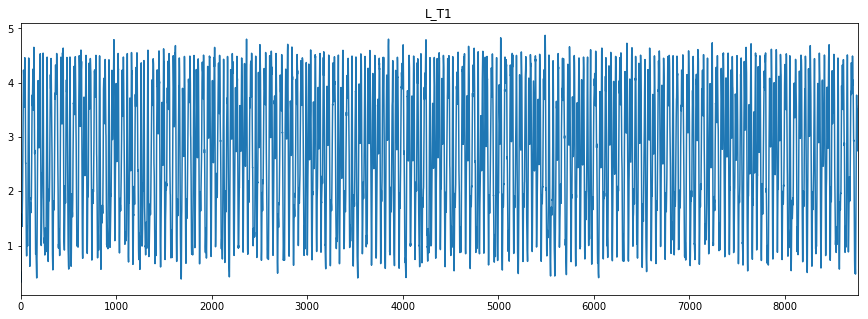

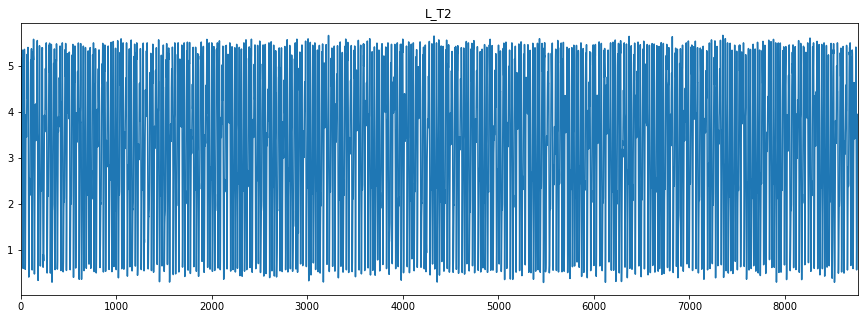

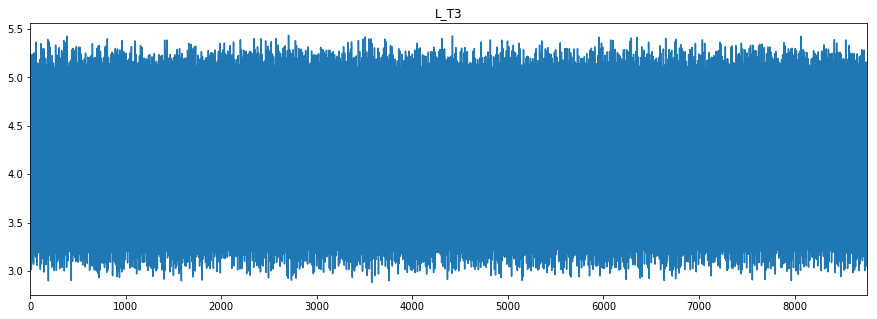

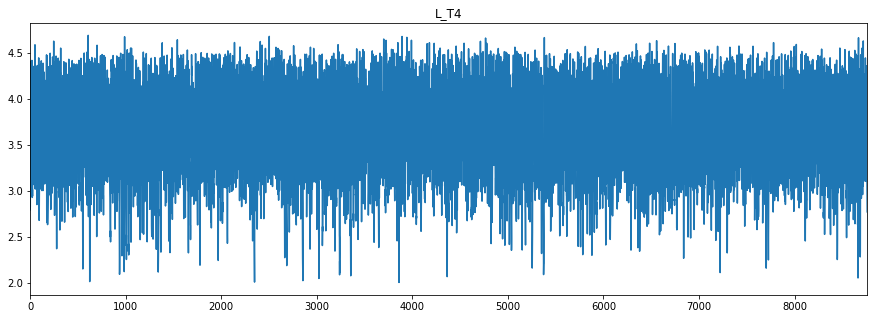

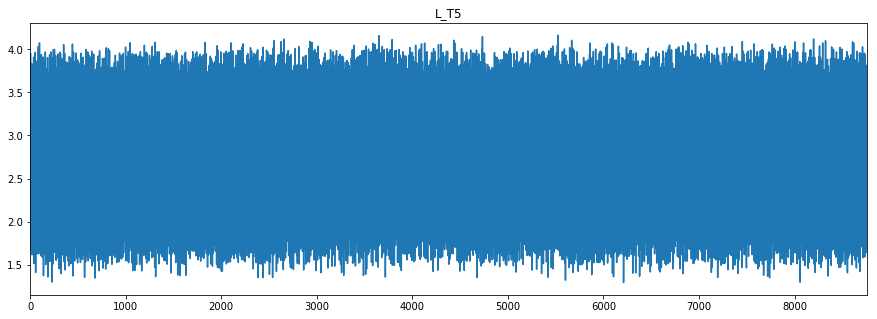

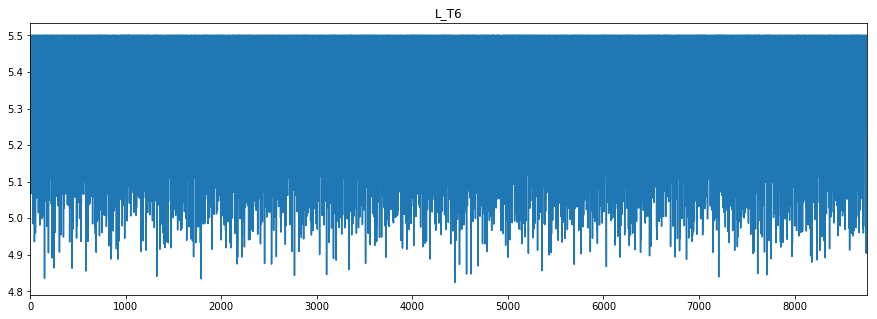

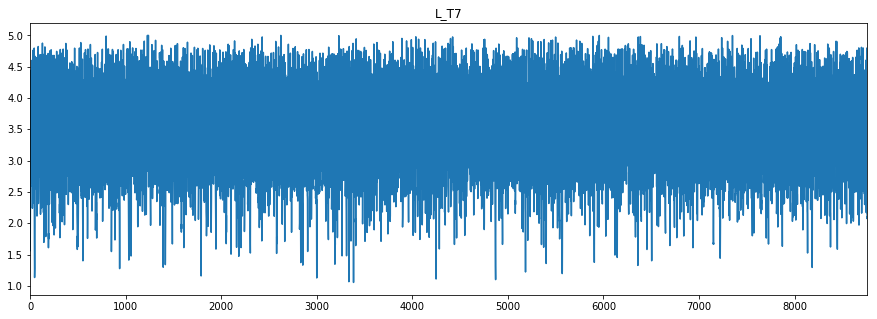

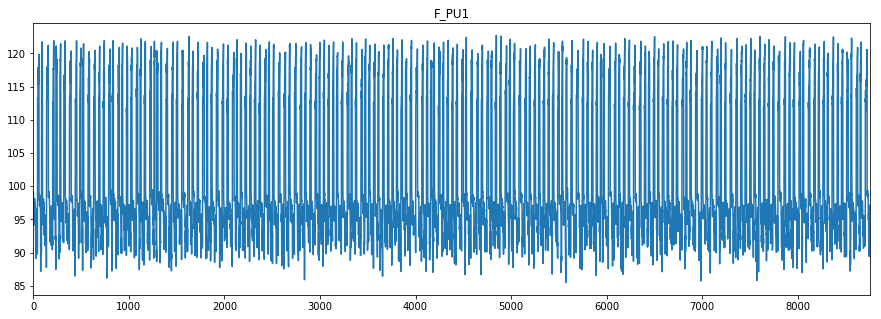

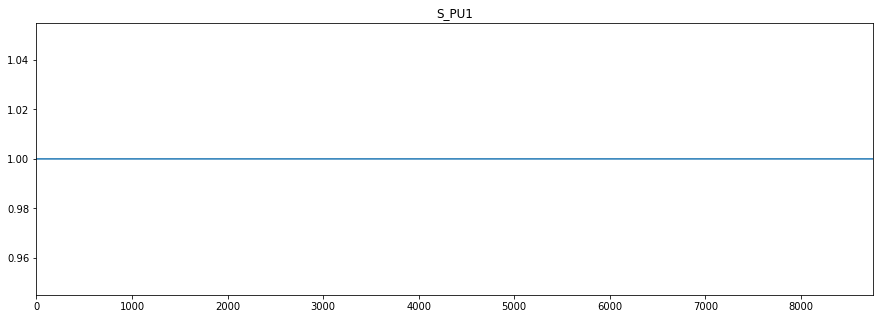

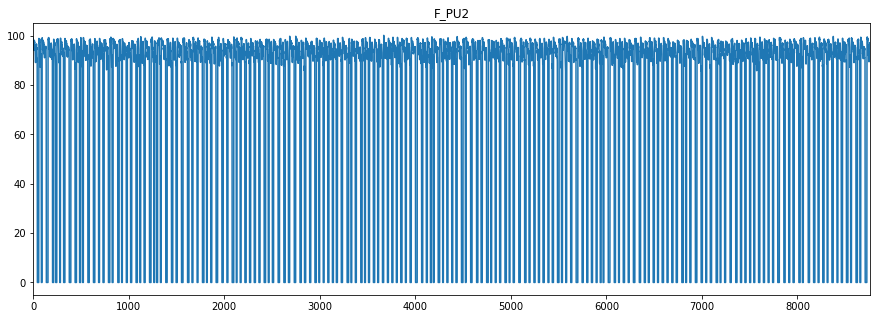

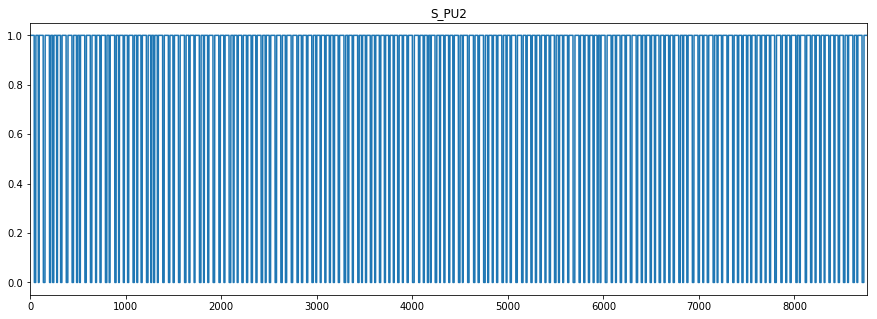

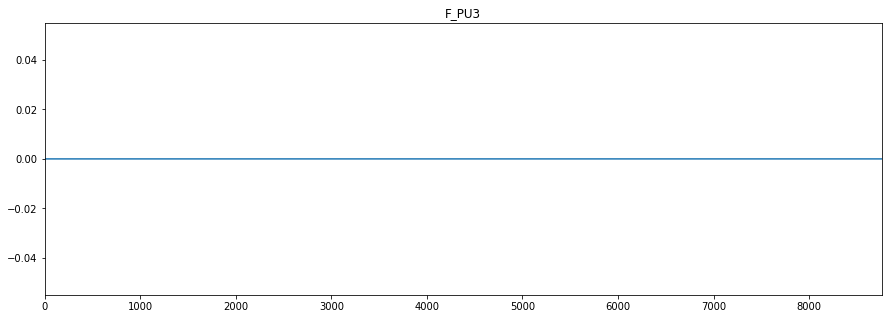

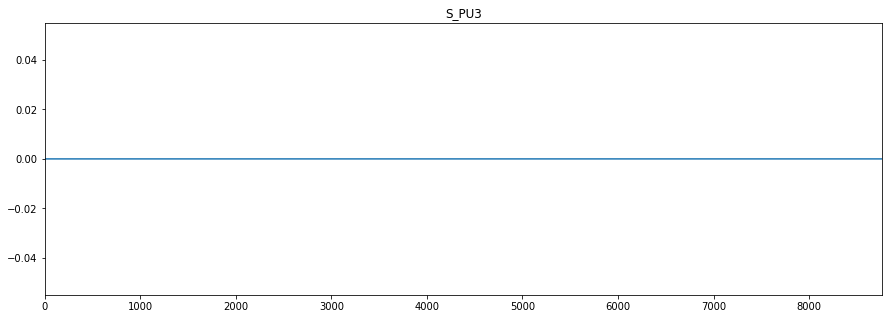

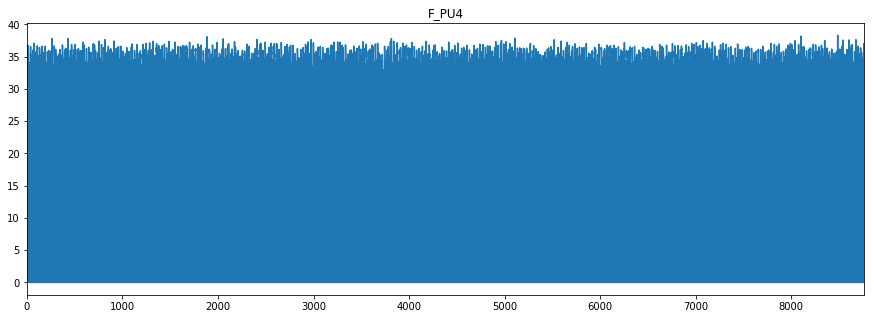

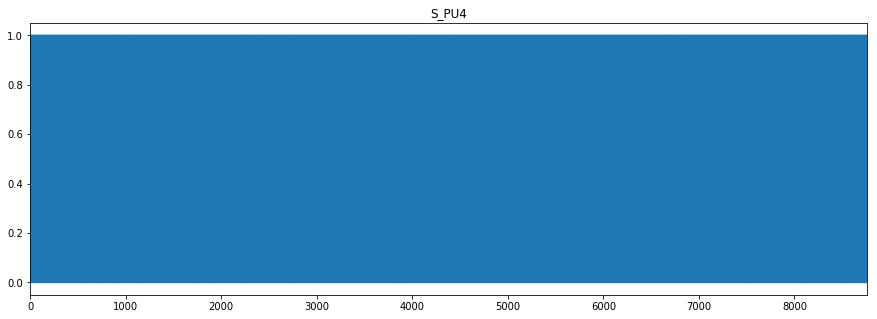

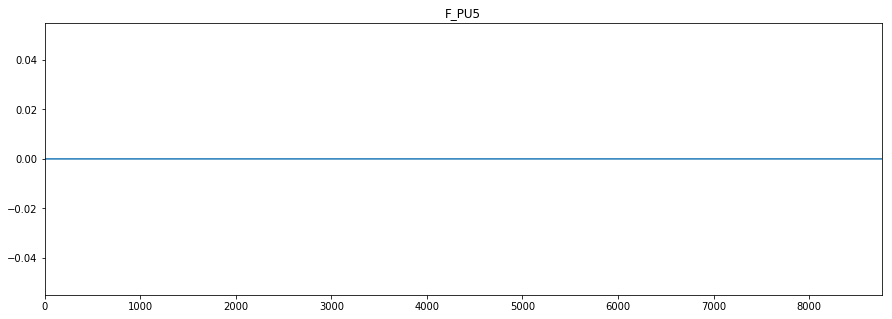

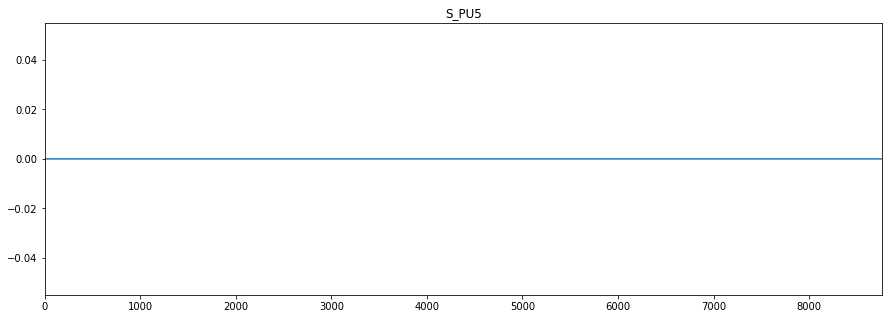

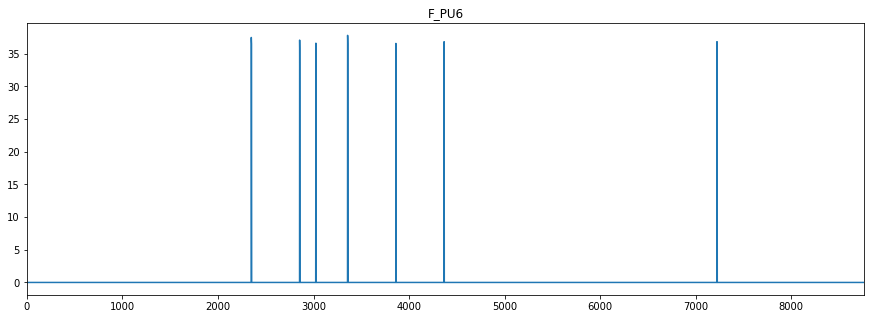

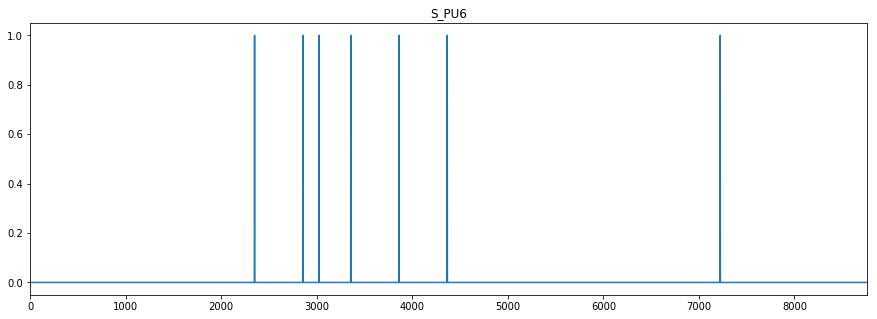

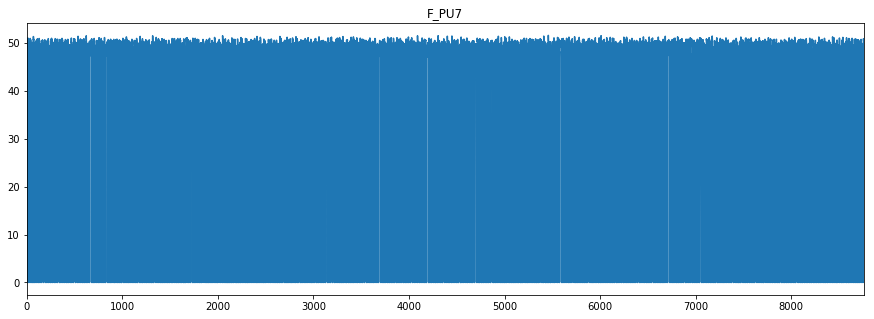

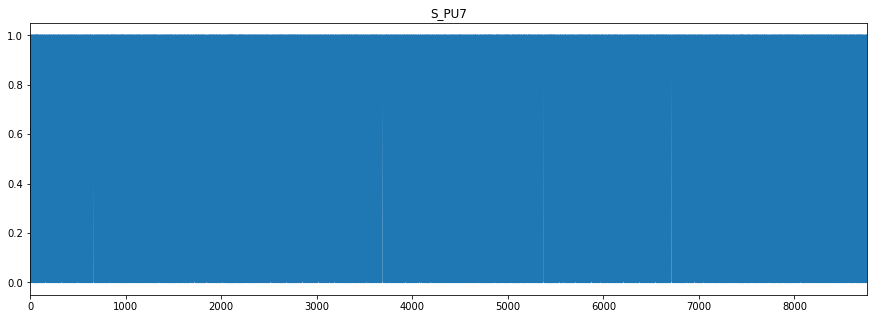

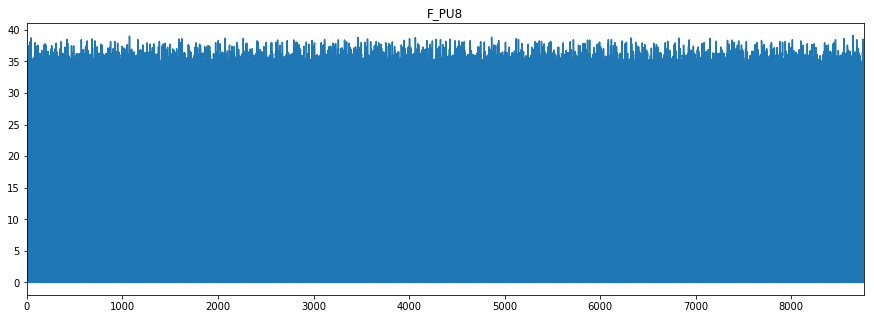

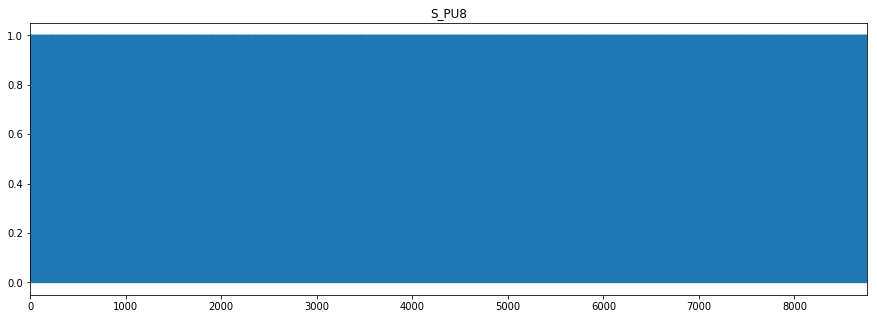

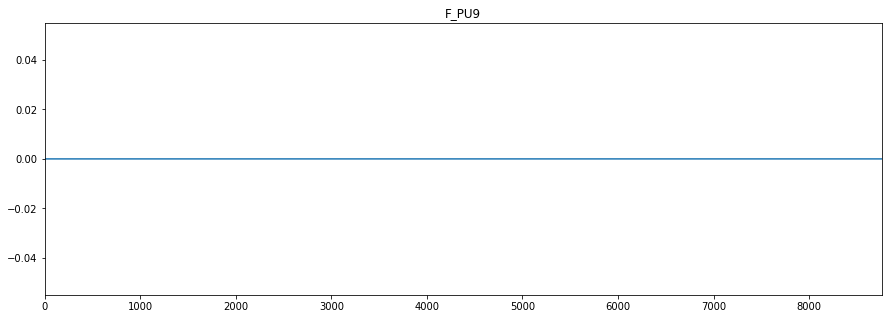

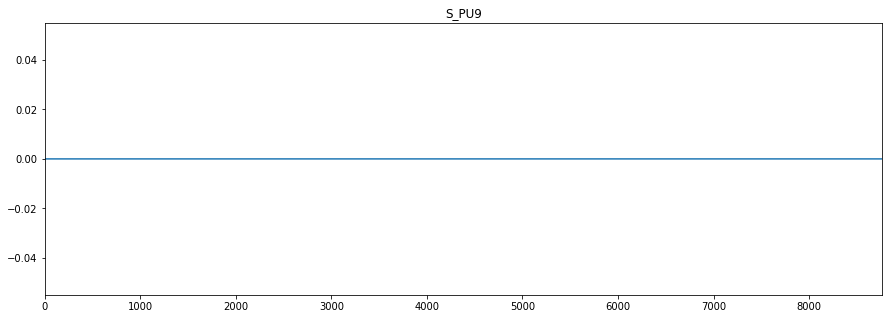

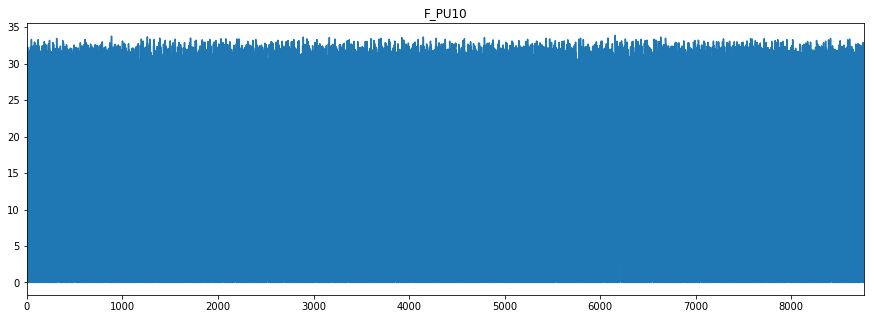

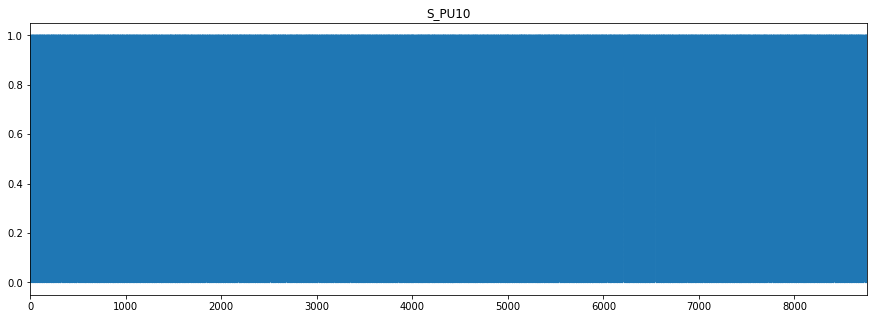

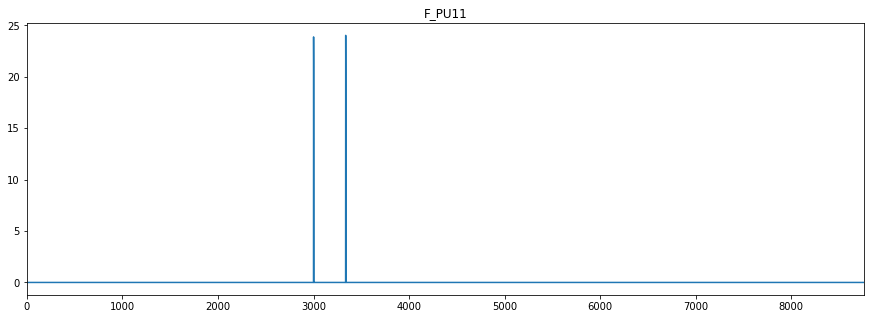

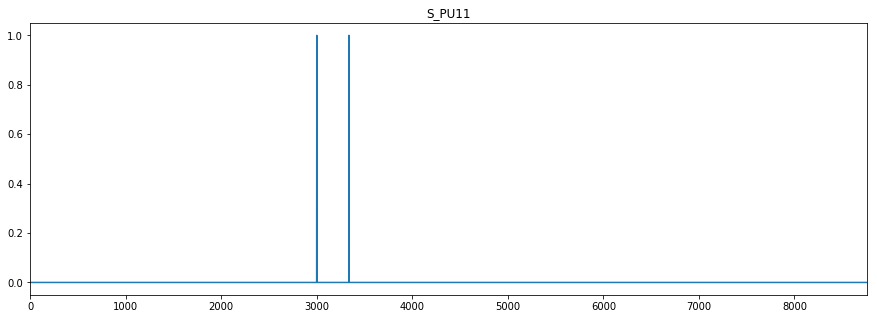

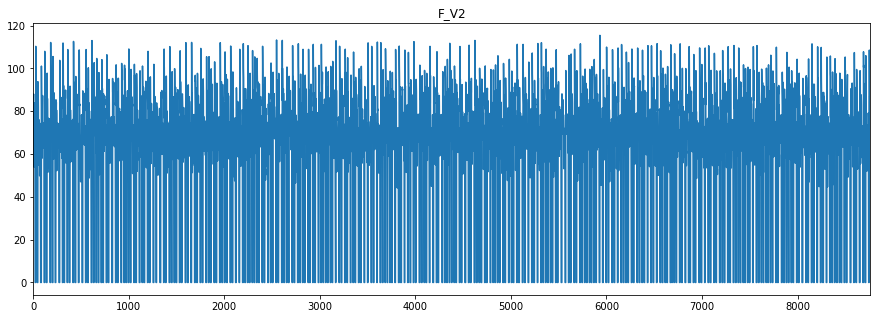

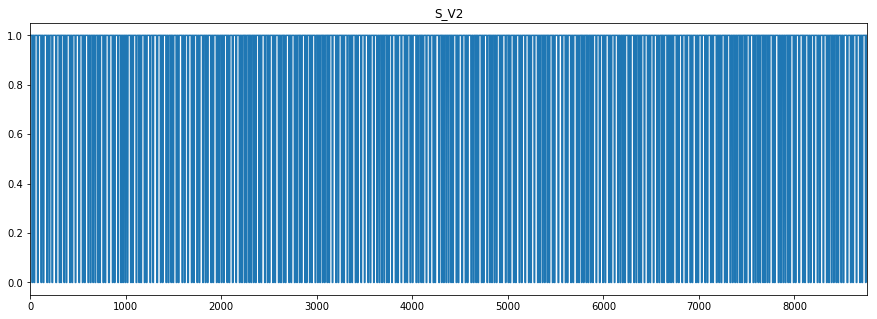

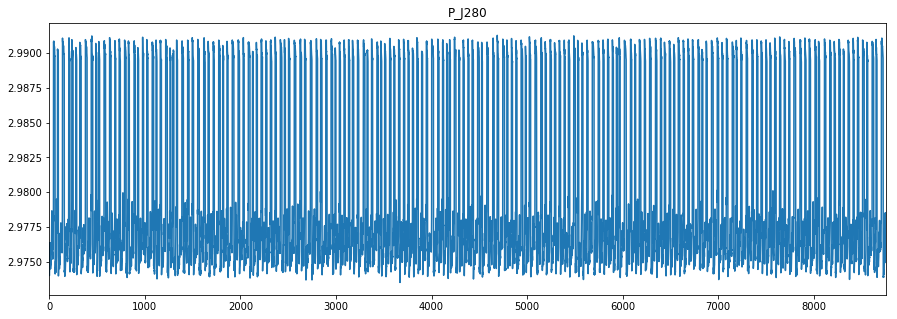

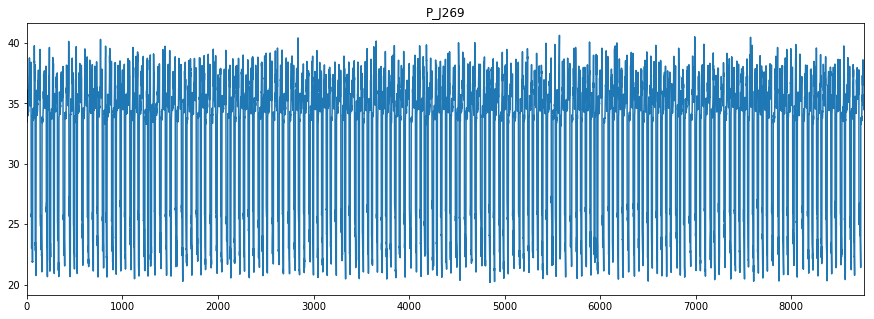

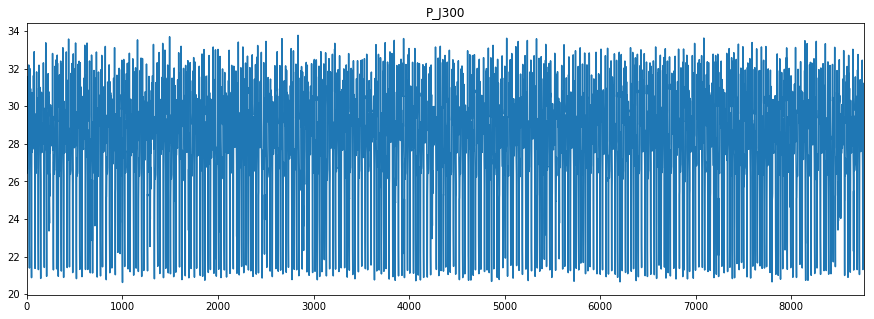

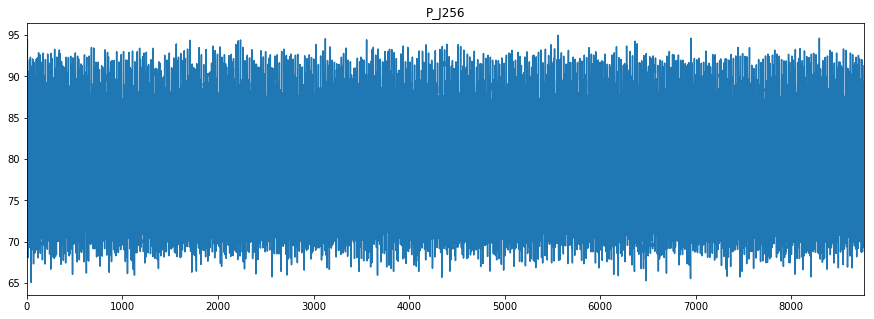

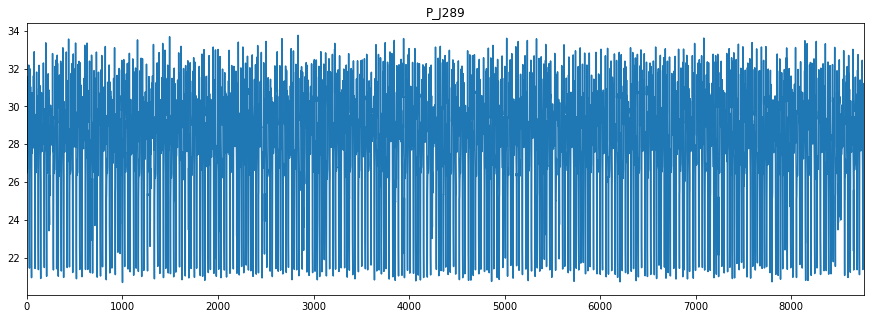

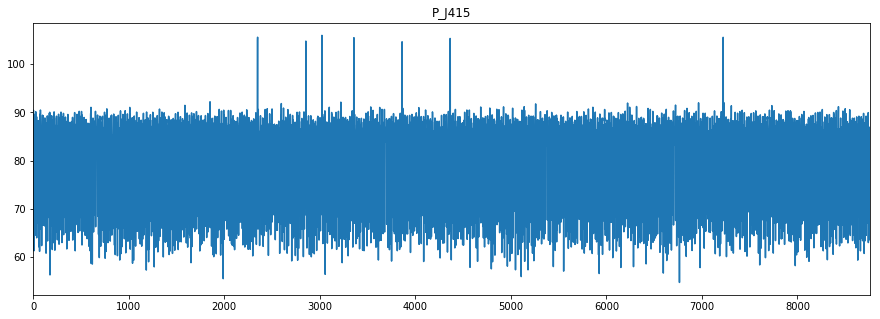

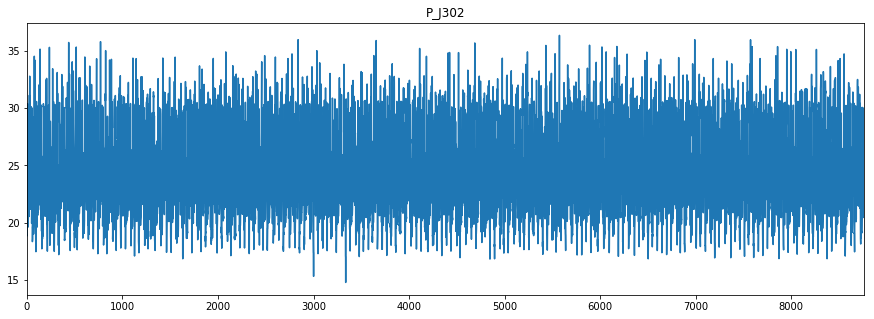

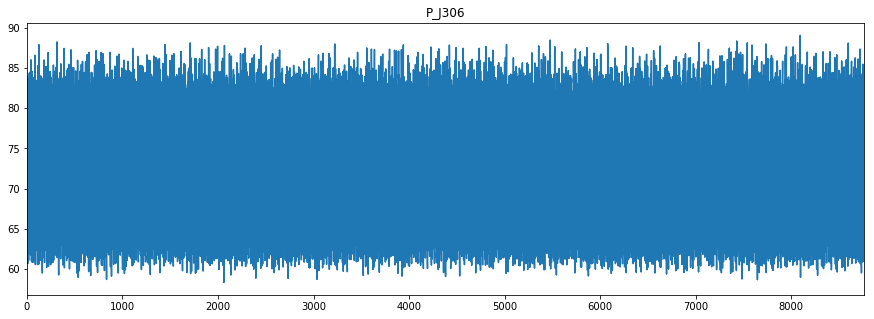

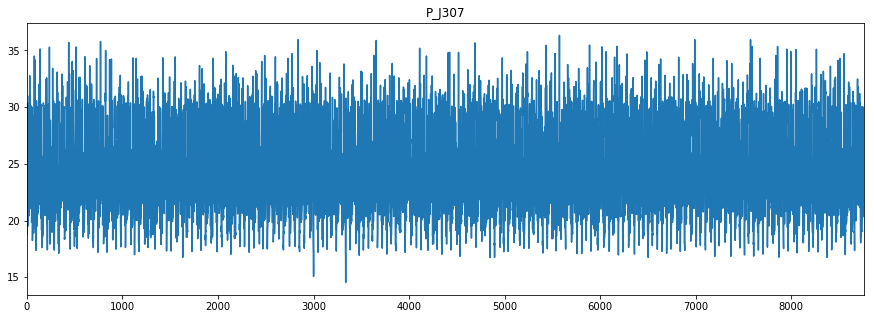

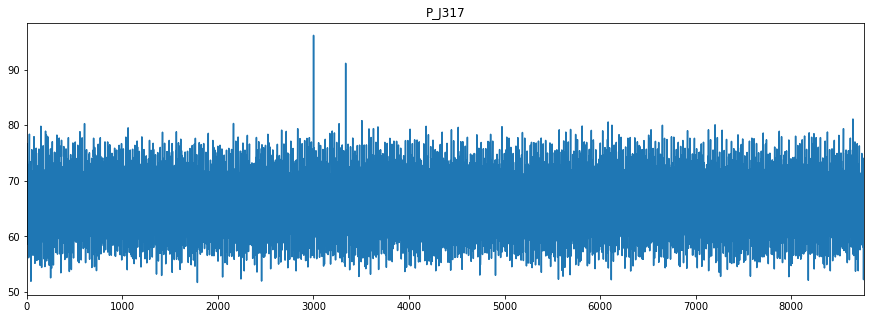

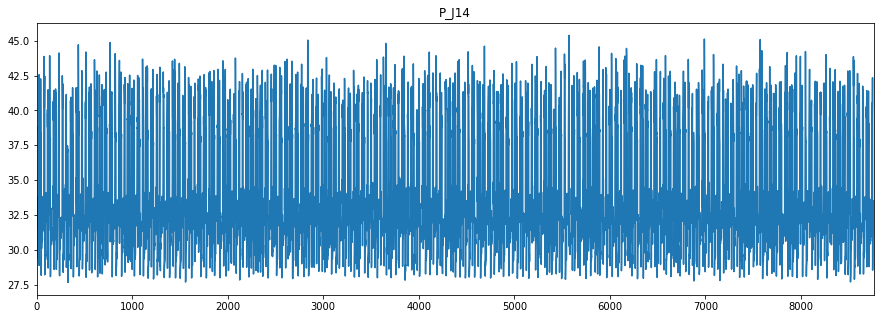

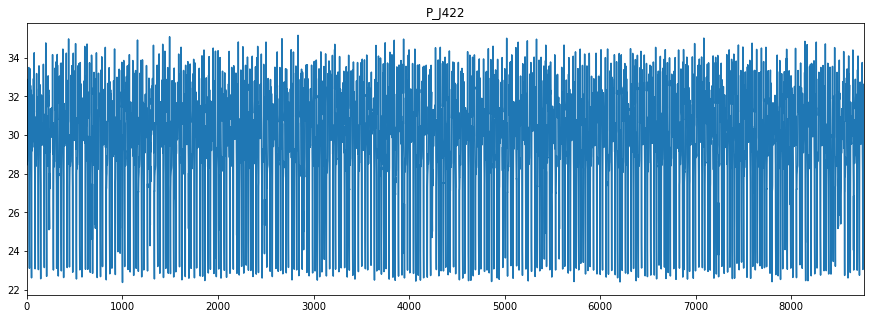

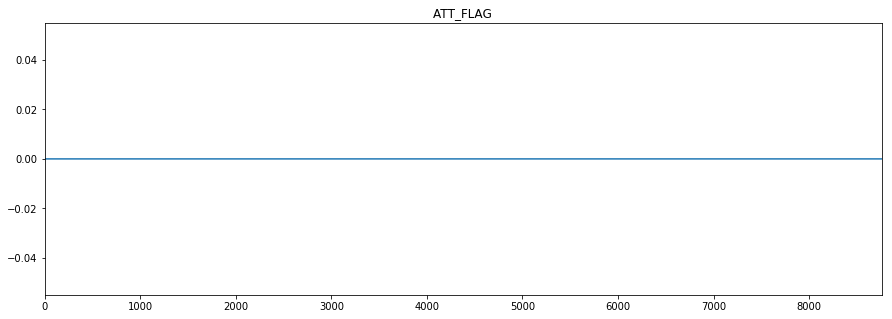

<Figure size 432x288 with 0 Axes>

In [95]:
for i, cl in enumerate(data.columns[1:]):
    plt.title(cl)
    data[cl].plot(figsize=(15,5))
    plt.show()
    plt.clf()

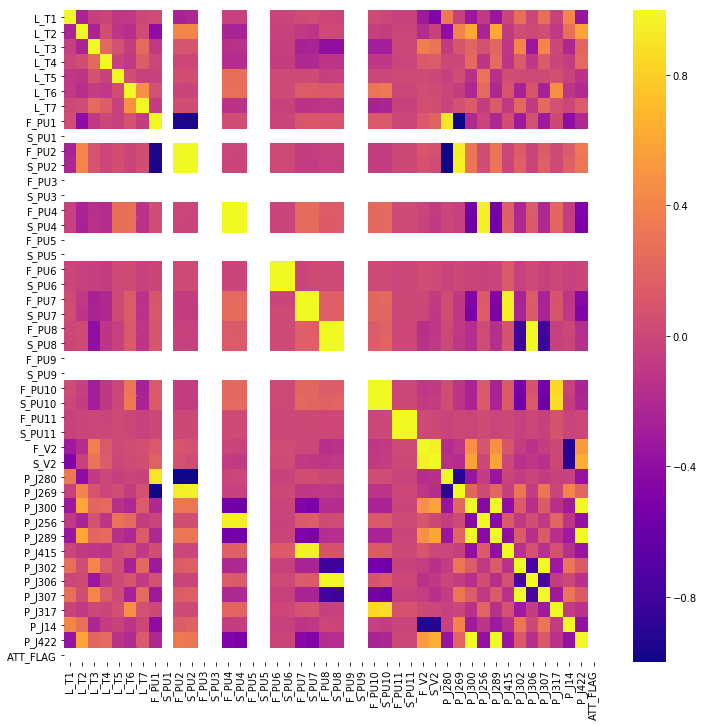

In [89]:
f, ax = plt.subplots(figsize=(12, 12))
corr = data.corr()
sns.heatmap(data.corr(), cmap='plasma')
plt.show()

 ### High correlated columns

In [180]:
cr_series = corr.unstack().sort_values(ascending=False).drop_duplicates().dropna()
cr = pd.DataFrame(cr_series)
cr['high'] = cr_series.between(-0.9, 0.9, inclusive=True)
cr = cr[cr['high']==False].drop('high', axis='columns').reset_index().set_axis(['x', 'y', 'correlation'], axis='columns', inplace=False)
cr = cr[cr['x'] != cr['y']]
display(HTML(cr.to_html()))


,x,y,correlation
1,P_J302,P_J307,0.999962
2,F_PU6,S_PU6,0.999887
3,P_J289,P_J300,0.999858
4,F_PU8,S_PU8,0.999141
5,S_PU4,F_PU4,0.998649
6,S_PU2,F_PU2,0.998614
7,F_PU7,S_PU7,0.997985
8,F_PU11,S_PU11,0.997564
9,F_PU10,S_PU10,0.996903
10,P_J289,P_J422,0.996560


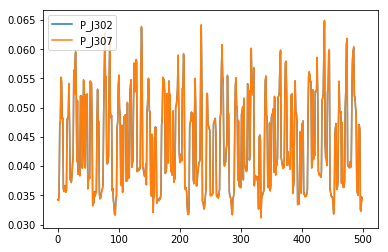

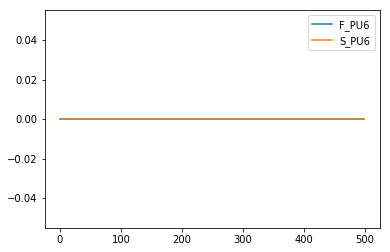

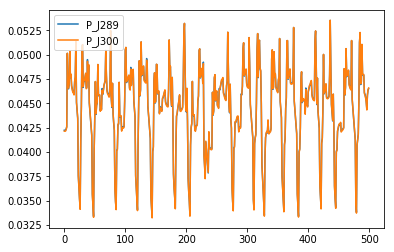

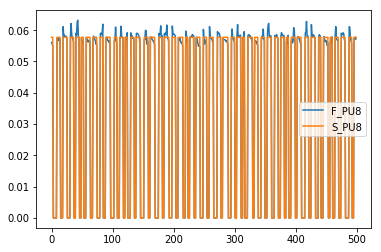

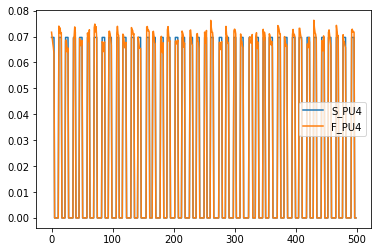

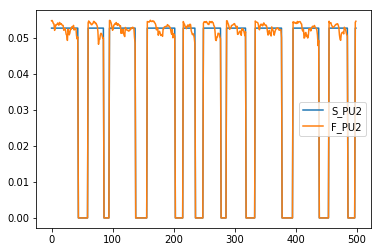

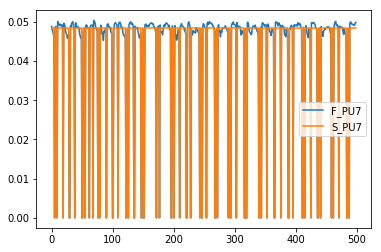

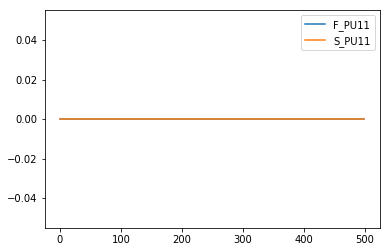

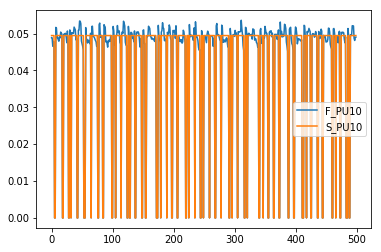

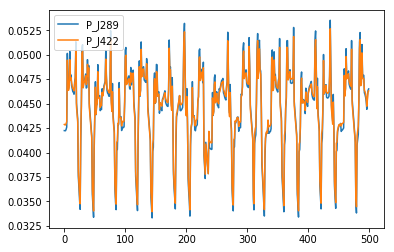

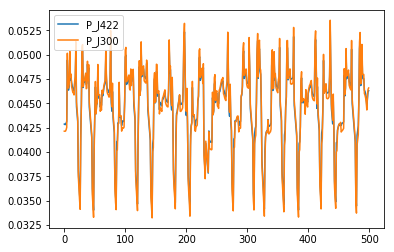

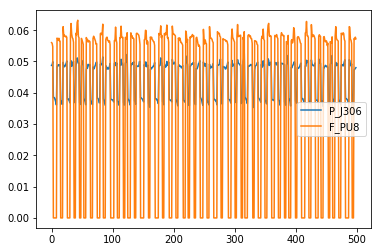

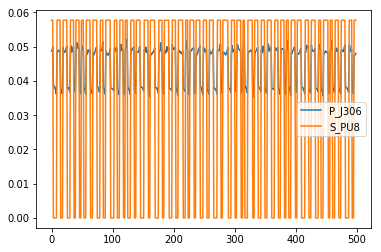

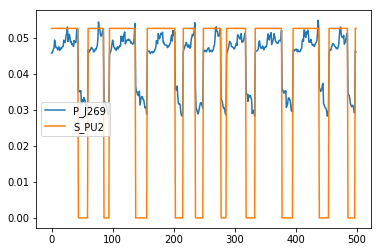

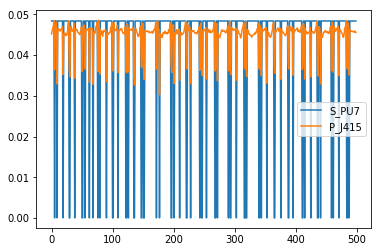

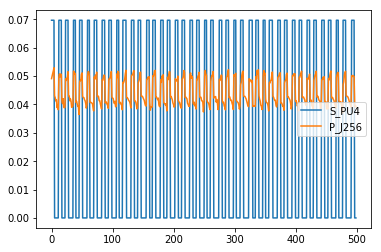

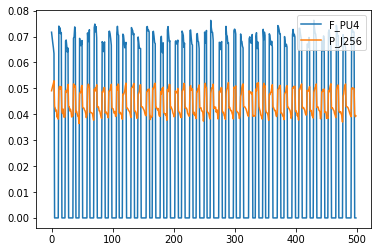

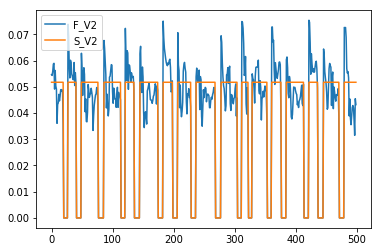

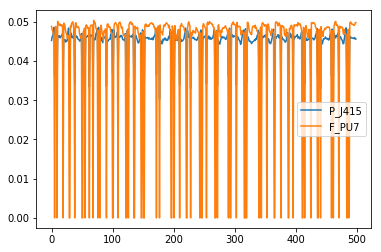

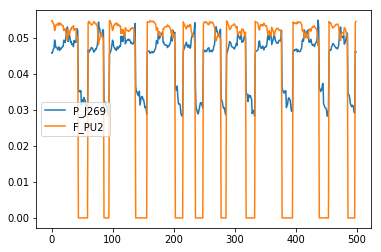

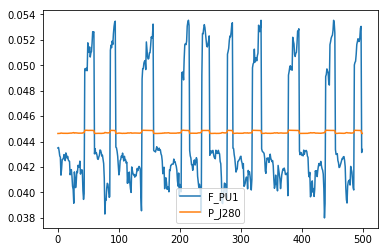

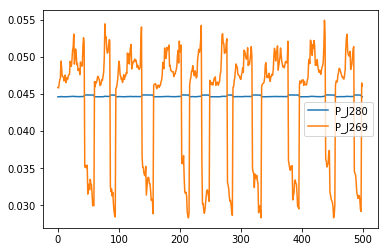

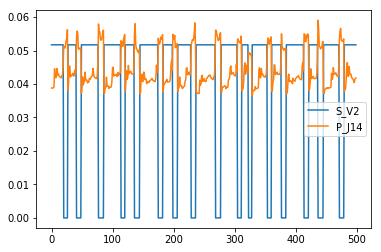

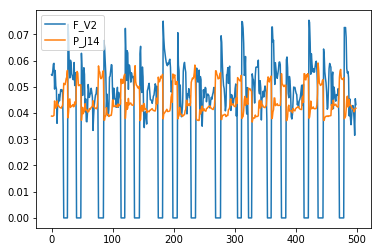

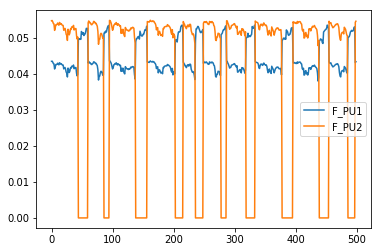

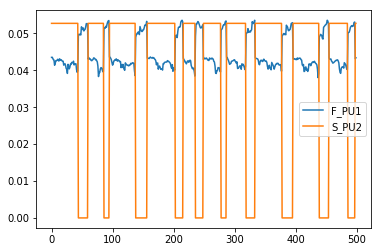

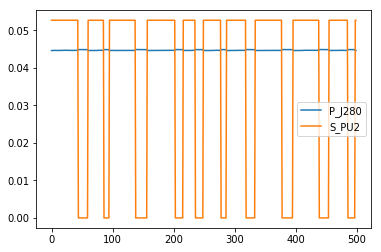

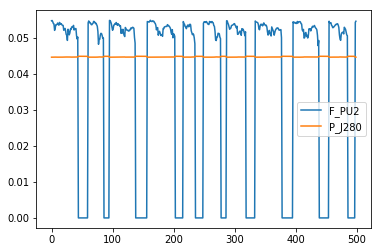

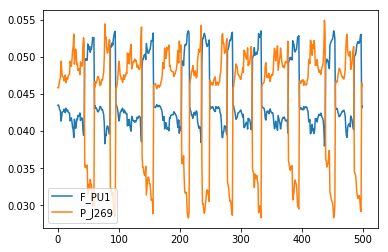

<Figure size 432x288 with 0 Axes>

In [181]:
for row in cr.itertuples():
#     print(row)
    plt.plot(normalize(data[row[1]][:500].values.reshape(1, -1)).reshape(-1, 1), label=row[1])
    plt.plot(normalize(data[row[2]][:500].values.reshape(1, -1)).reshape(-1, 1), label=row[2])
    plt.legend()
    plt.show()
    plt.clf()

# ARMA task 

Learn an autoregressive moving average model for at least 5 individual sensors (pick them in a sensible way!). Most statistical packages (statsmodels in Python) contain standard algorithm for fitting these models from training data. Use autocorrelation plots in order to identify the order of the ARMA models. The parameters can be determined using Akaike’s Information Criterion (AIC) or another model selection method. Note that there exists a wide range of ARMA variants; you only have to use the basic model. 

Decide how to set the detection threshold sensibly. Study some of the anomalies detected anomalies. What kind of anomalies can you detect using ARMA models? Which sensors can be modeled effectively using ARMA?

# Discrete models task

Discretize the sensor data using any of the methods discussed in class. Explain why you choose this method and why the obtained discretization makes sense. Visualize the discretization. 

Apply any of the sequential data mining methods (N-grams, Sequence alignment with kNN, …) to sliding windows with a length of your choosing in order to find anomalies. Whenever an observed Ngram’s probability is too small, or the sequential data is too distant from any training sequence, raise an alarm. Set your thresholds sensibly. What kind of anomalies can you detect using the sequential model? Which sensors can be modeled effectively?

# PCA task

Perform PCA-based anomaly detection on the signal data. Set the threshold on training data to a value that results in few false positives on the training data. Plot the PCA residuals in one signal. Do you see large abnormalities in the training data? Can you explain why these occur? It is best to remove such abnormalities from the training data since you only want to model normal behavior. What kind of anomalies can you detect using PCA?

# Comparison task

Compare the performance of the PCA method with the ARMA and discrete models. Comparing anomaly detection methods in not straightforward, and different research studies frequently use different measures. You can either:
* test point-wise precision and recall, or
* overlap-based false and true positives, or /and
* count a true positive if it detects at least one anomaly in an anomalous region, or
* compare the top-k detected anomalies,
* or...

Describe in a few lines which comparison method you chose for this data and why. Keep in mind that
in practice an analyst has to take action on every positive detected, but will not study every detected
data point. Do you recommend using PCA, ARMA, or discrete models?

# Bonus task

Use PyTorch (or another framework) to learn Deep Neural Networks for anomaly detection as discussed in class and in the literature. Try out different learning rates and detection thresholds. Compare the performance with the three approaches tested above. Do you recommend using Deep Learning? Why (not)?